# Can You aFORD It?
Andrew Barreiros

## Introduction
Over 39.3 million cars are sold in the US every year (Cox). This report will analyze the following, to understand the used car market:
    1. Used Car Demographics
    2. Ford Statistics
    3. Price vs Mileage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

## Outline of data
The dataset (1.2 million used car listings) was obtained from kaggle.com. The data was scraped from the TrueCar.com website on 9/24/2017. It contains price, year, mileage, make, model, etc. for over 1.2 million car listings created on TrueCar.com.

In [2]:
cars_df = pd.read_csv('TrueCarListings.csv')

# Uppercase all the letters in the state to have a uniform capitalization in the state column
cars_df['State'] = cars_df['State'].str.upper()

# del cars_df['Id'] as this is not any data associated with the listings
cars_df = cars_df.drop('Id', 1)

# Print a snippet of the data frame
cars_df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [3]:
# Checking to see that all the columns are the right type
cars_df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

## 1. Used Car Demographics
Data in its raw form is difficult to interpret. Several questions were asked to provide initial direction for this analysis. Additional questions were raised as part of the analysis. 

    - What states have the largest population of used cars for sale?
    - What make of car has the most listings?
    - What years have the most used cars for sale?

### Top 10 States
Texas, California, and Florida have the largest volume of listings, as expected, as they have some of the largest state populations. This chart suggests several follow-on questions. The first being, do these states have better used car prices due to larger available inventories? 

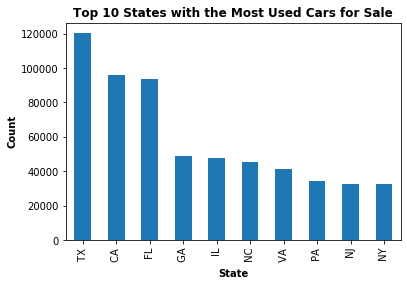

In [4]:
# Top 10 states barchart
cars_df['State'].value_counts().head(10).plot('bar')

plt.xlabel('State', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 States with the Most Used Cars for Sale', fontweight='bold')

plt.show()

### Top 20 Makes
Looking at the chart above, the two highest volume makes are Ford and Chevrolet with over 150,000 listings each. The Ford F-Series truck was the best selling vechicle in the US in 2018 (Business Insider). The high number of Ford listings could reflect the popularity of this line.

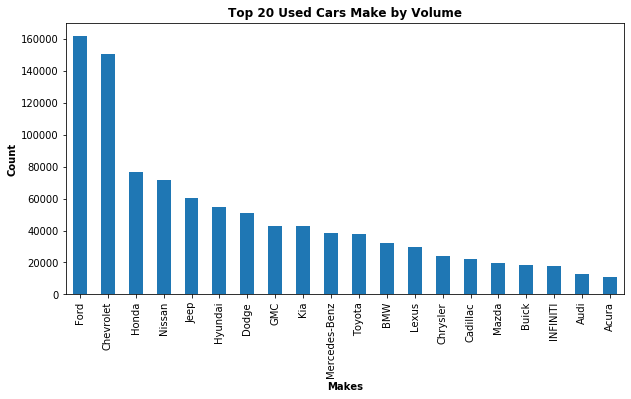

In [5]:
# Top 20 Makes barchart
plt.figure(figsize=(10, 5))
cars_df['Make'].value_counts().head(20).plot('bar')

plt.xlabel('Makes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Top 20 Used Cars Make by Volume', fontweight='bold')

plt.show()

### 5 Highest Volume Years
The pie chart below shows the 5 years with the largest inventories are from 2013-2017. 2014 and 2015 had the highest percentage of total listings, at 25.4% each. This chart raises an additional question: how does volume and age impact the price of a used car?

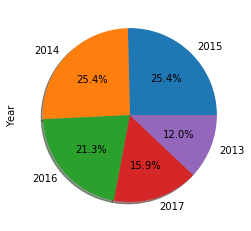

In [6]:
# Highest 5 inventory years
cars_df['Year'].value_counts().head(5).plot('pie', autopct='%1.1f%%', shadow=True)
plt.show()

#### Price vs. Year
As shown in the violin plot below, the majority of prices range from 10,000 to 30,000. The chart illustrates as cars age fewer are offered at a higher price point. How would applying a brand filter to this chart impact the results?

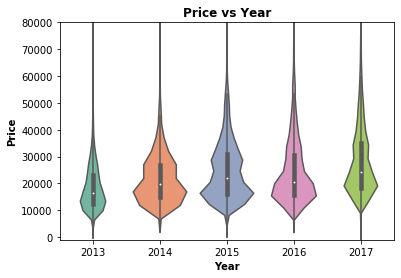

In [7]:
# Create a filter for the car data by the 5 highest inventory years
cars_years = cars_df[(cars_df['Year']>=2013) & (cars_df['Year']<2018)]

# Generates a violin chart showing frequency of price per year
cars_years_price = sns.violinplot(x='Year', y='Price', 
                                  data=cars_years, palette="Set2", split=True, scale="count")

cars_years_price.set(ylim=(-1000, 80000))
plt.title('Price vs Year', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Price', fontweight='bold')

plt.show()

### Selecting Ford for Further Analysis
As a result of the analysis above, several additional questions were raised. To answer these questions, we will drill down on a specific brand. Ford was chosen for this more granular analysis, as it is the brand with the largest population of listings. 

**Ford Price by Year -**
The data analyzed above included the entire population; the analysis could be skewed by many factors, including location, brand, and mileage. One clear example of the need for additional disaggregation is the trend observed in 2015, which is unusual in that there are more cars for sale above the 30,000 price point than the newer 2016 and 2017 years. The dataset is as of September 2017; therefore, 2015 model year cars were 2-3 years old when the data was gathered. 

According to a number of used car buying guides, a used-car buyer receives the greatest value when purchasing a car that is 2-3 years old(sweet spot). However, the data appears to contradict this conclusion by illustrating that more cars are listed at higher price points in the 2-3 year age band than at any other age. If the data supported the conclusion that 2-3 year old cars provide the best value, we would expect to see lower price points in the 2-3 year age band. Additional questions include: Is it truly the sweet spot? Has demand for this model year increased the price of these cars in a manner that is not consistent with the average model year?



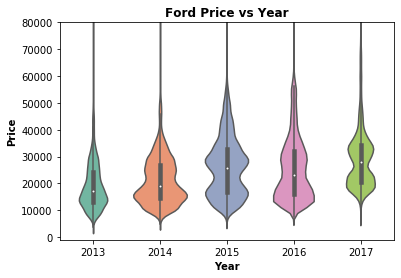

In [8]:
# Create a filtered dataframe by ford
ford = cars_df.loc[cars_df['Make']=='Ford']

# Create a filter for the ford data by the 5 highest inventory years
ford_year = ford[(ford['Year']>=2013)&(ford['Year']<2018)]

# Generates a violin chart showing frequency of price per year
ford_year_chart = sns.violinplot(x='Year', y='Price', 
                                 data=ford_year, palette="Set2", split=True, scale="count")

ford_year_chart.set(ylim = (-1000, 80000))
plt.title('Ford Price vs Year', fontweight = 'bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Price', fontweight='bold')

plt.show()

## 2. Ford Statistics
The section below will provide a more disaggregated analysis of Ford-specific trends. Specifically, what is the central tendency, what are the measures of variance, and which states have the most and least expensive listings. 

### Descriptive Statistics
Refer to the chart below for a summary of descriptive statistics for the entire population of Ford listings. We will further disaggregate the mean in the subsequent section to identify the states with the highest and lowest prices.

In [9]:
# Round the descriptive statistics to 2 decimal places
round(ford[['Price', 'Mileage', 'Year']].describe(), 2)

,Price,Mileage,Year
count,161999.00,161999.00,161999.00
mean,21311.80,57283.25,2013.21
std,11377.85,44952.95,3.51
min,1500.00,5.00,1997.00
25%,12995.00,26282.00,2012.00
50%,18981.00,43567.00,2014.00
75%,28000.00,79036.00,2016.00
max,399999.00,2136501.00,2018.00


### Price difference based on location
#### Highest Priced States
The highest priced states are Wyoming, Mississippi, and Utah, respectively. The mileage and age of the vehicle does not significatly differ from the population, yet these states have an otherwise unexplained 4,000 premium. Possible explanations include, higher than average demand for Ford cars or lack of supply. Wyoming for example has a low population of listings, which could explain its higher prices. However, the latter is considered unlikely in Utah and Mississippi due to the volume of listings is high. The populations of these listings are shown in the charts in section 3 of this report. A more likely explanation, is that the price differential stems from car-model-buying preferences. Because the potential price range for a Ford car is significantly lower than the potential price range for a Ford truck, we conjecture that buyers in higher priced states are more interested in purchasing Ford trucks rather than Ford cars, while the opposite is true in lower priced states. Further investigation should be made to review the percentage of cars versus trucks sold in the three highest and three lowest price states.

In [10]:
# Group the dataframe by state and calculate the mean per state
ford_price_state = ford.groupby(['State'], as_index=False).mean()

# Return the 3 states with the highest average prices
ford_price_state.nlargest(3, 'Price').sort_values('Price',)

,State,Price,Year,Mileage
44,UT,24898.946067,2013.732210,51450.007116
25,MS,25562.587838,2013.718468,56715.041104
50,WY,25738.415205,2012.795322,62893.707602


#### Lowest Priced States
**DC Outlier -**
Washington DC was identified as the lowest average priced location. The average price and mileage for DC are half and double of the next lowest state, respectively. Additionally the average year of Ford listings in Washington DC is 2002. We hypothesized regarding the reason for these discrepencies, but did not perform additional analysis. As such, DC listings were removed from the analysis and the list was re-run.

**Updated List -**
The lowest priced states are Michigan, Hawaii, and Virginia. Michigan is home to three Ford factories, and the lower prices could reflect this close proximity and the resultant increase in supply(factories). Hawaii is one state that stands out on the list. One would expect Hawaii to be one of the most expensive states to own a Ford car due to its remote location. At first glance, this doesn't seem to be the case. Upon further inspection, the data that suggests it is one of the lowest priced states is somewhat misleading. Upon further investigation, the average year of a Hawaiian Ford listing is 2011, which is approximately six years old. This is two years older than the population mean, which is 4 years old. If age is taken into consideration, Hawaii is actually quite expensive, as the price of a Hawaiian car that is approximately two years older than a car in a different state, appears to be comparable. 

In [11]:
ford_price_state.nsmallest(3, 'Price')

,State,Price,Year,Mileage
7,DC,9495.000000,2002.000000,135995.000000
22,MI,18048.912112,2012.636306,65650.134867
11,HI,18328.852227,2011.161943,57282.419028


In [12]:
ford_price_state.drop(ford_price_state[ford_price_state['State']==' DC']
                      .index, inplace = True)

ford_price_state.nsmallest(3, 'Price')

,State,Price,Year,Mileage
22,MI,18048.912112,2012.636306,65650.134867
11,HI,18328.852227,2011.161943,57282.419028
45,VA,18335.214612,2012.390326,64783.212075


In [13]:
# Generate sublists for each identified state
utah = ford_year.loc[ford['State']==' UT']
mississippi = ford_year.loc[ford['State']==' MS']
wyoming = ford_year.loc[ford['State']==' WY']
michigan = ford_year.loc[ford['State']==' MI']
hawaii = ford_year.loc[ford['State']==' HI']
virginia = ford_year.loc[ford['State']==' VA']

# Group the sublists together
top_bottom_3 = [wyoming, mississippi, utah, virginia, hawaii, michigan]
results = pd.concat(top_bottom_3)

#### Chart of Highest / Lowest Priced States
The chart below summarizes the data analyzed above by state. The higher priced states have more cars above the population mean. Utah's chart shows that the price in that state is bimodal, which could be an indicator that there are two different groups within its data. The lower priced states show a positive shew as most of the values are below the populaiton mean of 21,000.

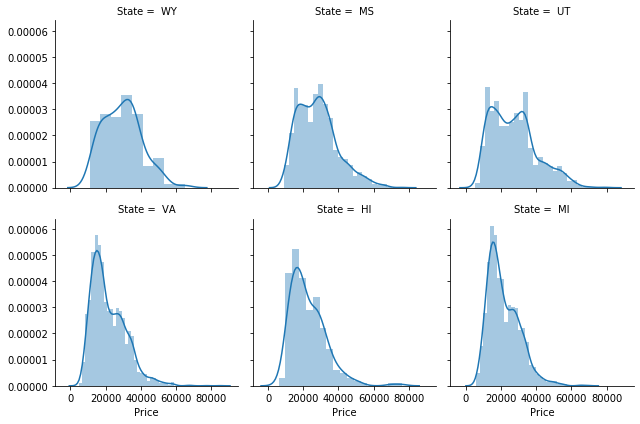

In [14]:
# Generates a 3 x 2 histogram gid of the price frequency per state
price_state_chart = sns.FacetGrid(results, col='State', col_wrap=3)

# norm_hist = false, adjust histogram scale for better comparison
price_state_chart.map(sns.distplot, 'Price', norm_hist=False)
plt.show()

## 3. Price vs Mileage for the Complete Population
Conventional wisdom suggests putting miles on a car decreases its value, but is that truly the case? The scatterplot below shows the price vs. mileage by year for the entire population. Generally, a downward trend is observed in each year. This general trend supports the conventional wisdom. However, for model years 2017 and 2015, this trend was not observed. Both 2017 and 2015 show an almost flat trendline, meaning there is no correlaton between miles and price. Let's look at the Ford population in greater depth for more insights.

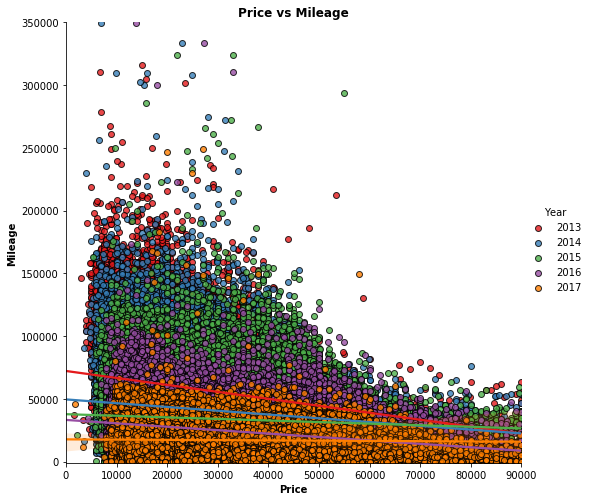

In [15]:
# Generate scatter plot with trendlines for 5 years
price_mileage = sns.lmplot(data=cars_years, x='Price', y='Mileage', 
                           hue='Year', height=7,  palette="Set1",
                           scatter_kws={'linewidths':1, 'edgecolor':'black'})

# Adjust the limits for better visualization
price_mileage.set(ylim=(-1000, 350000))
price_mileage.set(xlim=(0, 90000))
plt.title('Price vs Mileage', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Mileage', fontweight='bold')

plt.show()

### Price vs. Mileage for Ford Population
As shown in the shatterplot below, the trendlines are similar to the general population. 2017, unlike the general population, exhibits a downward trend, while 2015 has a flatter downward trend. Does this trend continue by state?

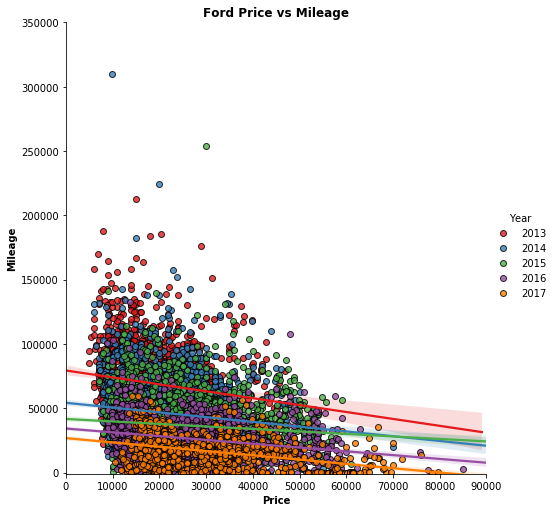

In [16]:
# Generate scatter plot with trendlines for 5 years for Ford cars
ford_price_mileage = sns.lmplot(data=results, x='Price', y='Mileage', 
                                hue='Year', height=7, palette="Set1", 
                                scatter_kws={'linewidths':1, 'edgecolor':'black'})

# Adjust the limits for better visualization
ford_price_mileage.set(ylim=(-1000, 350000))
ford_price_mileage.set(xlim=(0, 90000))
plt.title('Ford Price vs Mileage', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Mileage', fontweight='bold')

plt.show()

### Ford Price vs Mileage by State
This is where the data really gets interesting. Wyoming and Hawaii do not follow the typical trend in 2017, exhibiting an upward trendline. There is a clear lack of supply of new cars in these states, as evidenced by the average age previously observed, as well as the volume of listings shown below, in these areas, which has caused listers to ignore mileage when listing one year old cars. In Utah, the steepest negative trendline is observed for 2017, whereas the 2013-2015 lines are virtually flat. Buyers in Utah are more likely to buy used cars than new ones. Michigan's 2013 trendline, in contrast is very steep, which creates a buyer's market, forcing sellers to compete on price. 

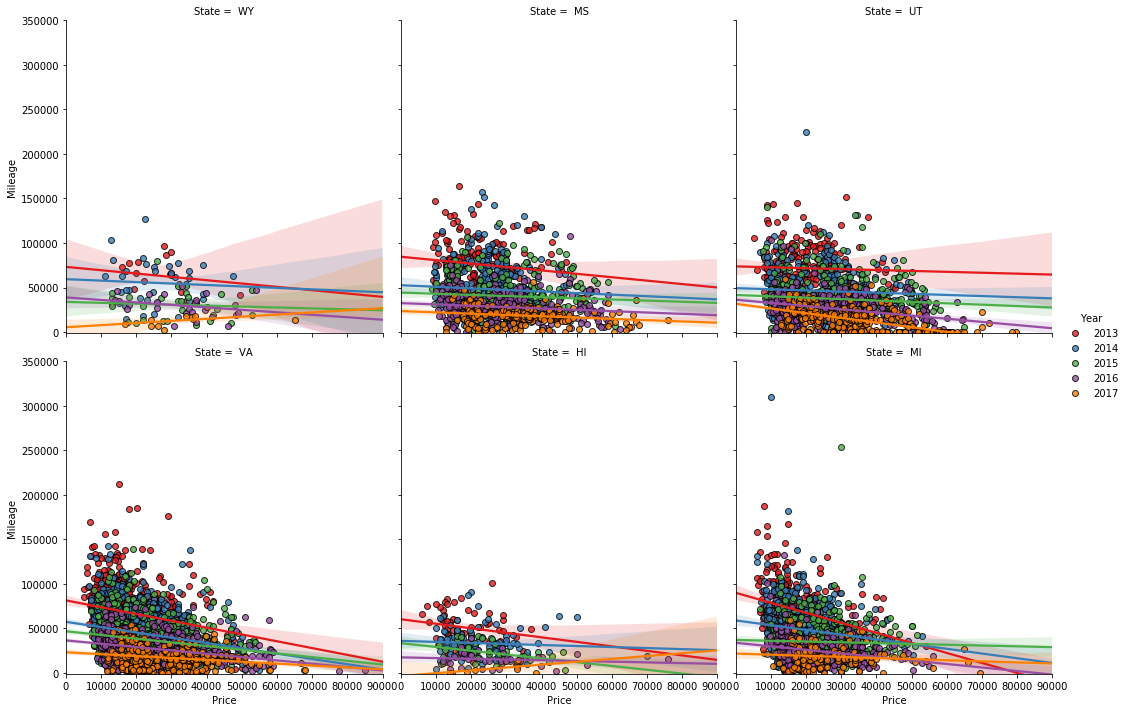

In [17]:
# Generate 3 x 2 grid for ford scatterplot per selected state
ford_price_mileage_state = sns.lmplot(data=results, x='Price', y='Mileage', 
                                      hue='Year', col='State', col_wrap=3,  palette="Set1",
                                      scatter_kws={'linewidths':1, 'edgecolor':'black'})

# Adjust the limits for better visualization
ford_price_mileage_state.set(ylim=(-1000, 350000))
ford_price_mileage_state.set(xlim=(0, 90000))
plt.show()

## Conclusion
Buying a car is a large investment. The analysis above shows how conventional wisdom does not hold true in many circumstances. Each market and brand has unique characteristics that affect the value of a car. One should do their due dilligence when purchasing a vehicle.

## Proposed Further Research
Below are some additional research that could be done with this dataset/analysis:
    - Perform additional analysis to pinpoint the ideal time to buy or sell a car based on price, mileage, market, etc.
    - Disaggregate the dataset further by model. Many additional questions could be answered if one knew which models are         in demand in specific markets. 
    - Identify most and least profitable brand by state to inform sellers and buyers, respectively 

## References

1.2 Million Used Car Listings - https://www.kaggle.com/jpayne/852k-used-car-listings

Business Insider - https://www.businessinsider.com/best-selling-cars-and-trucks-in-america-in-2018-2018-8#1-ford-f-series-451138-49-20

Cox - https://www.coxautoinc.com/news/cox-automotive-2018-used-car-market-report-outlook-forecast-higher-used-vehicle-sales-for-2018-and-a-decline-in-new-car-sales/

Sweet Spot - https://www.nerdwallet.com/blog/loans/used-car-buying-sweet-spot/

Factories - https://en.wikipedia.org/wiki/List_of_automotive_assembly_plants_in_the_United_States#Ford_Motor_Company